# Unsupervised Image Clustering

## Preparation

In [2]:
pip install opencv-python scikit-image

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/3f/a4/d2537f47fd7fcfba966bd806e3ec18e7ee1681056d4b0a9c8d983983e4d5/opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 12.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/63/4e/f5404467b31cf640ed8de31a283d104c845be6fa430dac9daef0c4385af8/tensorflow-2.17.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.o

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import cv2
import numpy as np
from skimage.io import imread
from skimage.color import gray2rgb
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

2024-08-13 21:56:49.526837: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-13 21:56:49.531043: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-13 21:56:49.543895: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 21:56:49.565185: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 21:56:49.572060: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 21:56:49.589308: I tensorflow/core/platform/cpu_feature_gu

## Feature extraction

In [152]:
# Set the image folder path
folder_path = '4_unsupervised_clustering/zhengyang_osi_512'
image_folder = folder_path

# Read all image file names and calculate the total number of files
def load_image_filenames(folder):
    filenames = [os.path.join(folder, filename) for filename in os.listdir(folder) if filename.endswith(('.png', '.jpg', '.jpeg'))]
    return filenames

# Extracting CNN features
def extract_cnn_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))  # VGG16 requires 224x224 input
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)  # Preprocessing Input
    features = model.predict(img_data)
    return features.flatten()

# Load the pre-trained VGG16 model, excluding the last fully connected layer
model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# Get all image file names
image_filenames = load_image_filenames(image_folder)

# Set batch_size to the total number of files
batch_size = len(image_filenames)
print(f"Total number of images: {batch_size}")

# Extract CNN features of all images
cnn_feature_matrix = np.array([extract_cnn_features(filename, model) for filename in image_filenames])

Total number of images: 160
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/st

## Finding the optimal number of principal components

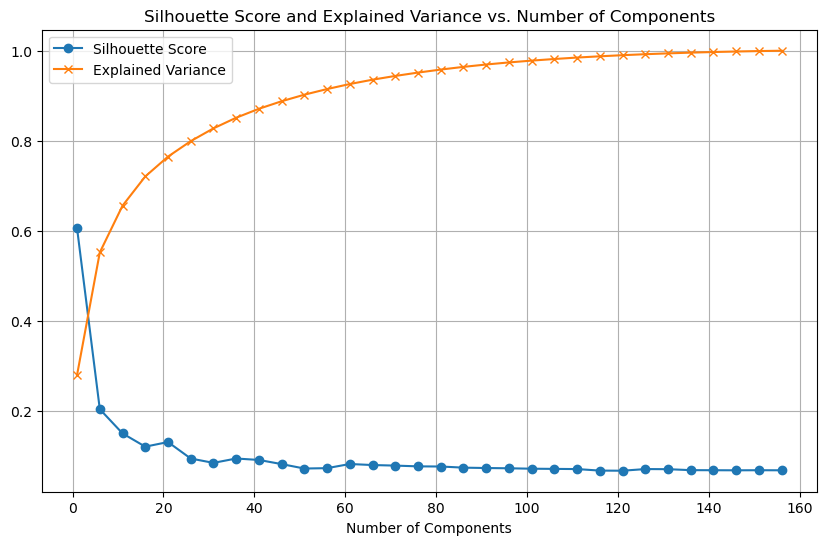

In [153]:
# Gradually increase the number of principal components and record the Silhouette Score and cumulative explained variance at the same time
silhouette_scores = []
explained_variances = []
upper_limit = min(batch_size,200)
components_range = range(1, upper_limit, 5)  # Adjust range and step size as needed

for n_components in components_range:
    ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
    
    # Perform PCA dimensionality reduction on the entire cnn_feature_matrix
    reduced_features = ipca.fit_transform(cnn_feature_matrix)
    
    # Clustering
    kmeans = KMeans(n_clusters=10, random_state=42)
    kmeans.fit(reduced_features)
    
    # Calculate Silhouette Score
    silhouette_score_value = silhouette_score(reduced_features, kmeans.labels_)
    silhouette_scores.append(silhouette_score_value)
    
    # Log explained variance
    explained_variance = np.sum(ipca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(components_range, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(components_range, explained_variances, label='Explained Variance', marker='x')
plt.xlabel('Number of Components')
plt.legend()
plt.title('Silhouette Score and Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

## Set the number of principal components

In [154]:
n_components = min(batch_size,60)
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
reduced_feature_matrix = ipca.fit_transform(cnn_feature_matrix)

## Analyzing the optimal number of clusters

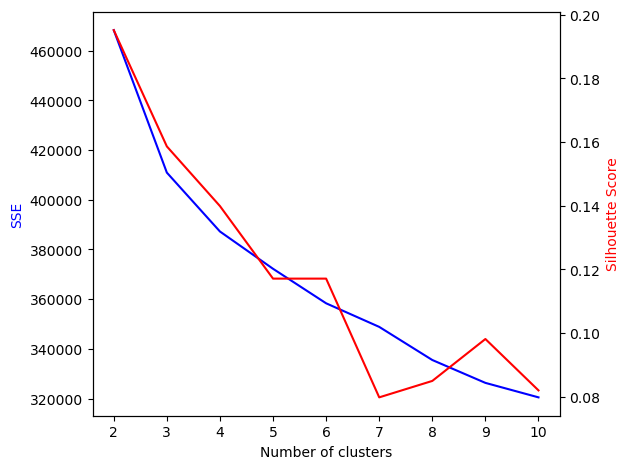

In [155]:
def determine_optimal_clusters(reduced_feature_matrix, max_clusters=10):
    sse = []
    silhouette_scores = []
    
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(reduced_feature_matrix)
        sse.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(reduced_feature_matrix, kmeans.labels_))
    
    # Plotting the elbow rule and silhouette coefficient curves
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(range(2, max_clusters + 1), sse, 'b-', label='SSE')
    ax2.plot(range(2, max_clusters + 1), silhouette_scores, 'r-', label='Silhouette Score')
    ax1.set_xlabel('Number of clusters')
    ax1.set_ylabel('SSE', color='b')
    ax2.set_ylabel('Silhouette Score', color='r')
    fig.tight_layout()
    plt.show()
    
    return sse, silhouette_scores

# Analyzing the optimal number of clusters
sse, silhouette_scores = determine_optimal_clusters(reduced_feature_matrix)

## Set the number of clusters

In [156]:
n_clusters = 4

## Perform K-means clustering

In [157]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(reduced_feature_matrix)
labels = kmeans.labels_

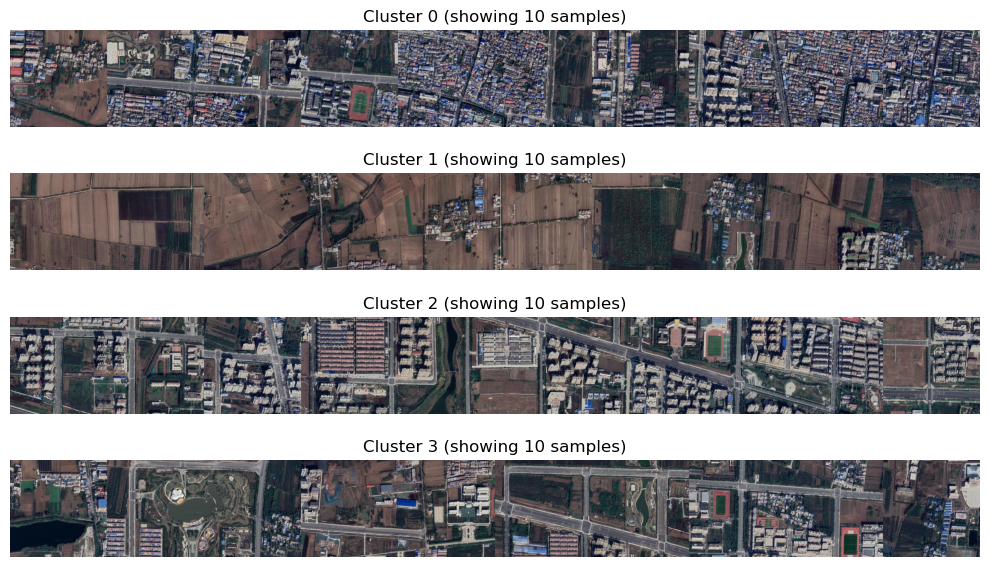

In [158]:
# Create a results list
results = [{'filename': os.path.basename(image_filenames[i]), 'cluster': labels[i]} for i in range(len(image_filenames))]

# Read all images for display
images = [imread(filename) for filename in image_filenames]

# Visualizing clustering results
def plot_clusters(images, labels, n_clusters, max_samples=10):
    fig, axes = plt.subplots(n_clusters, 1, figsize=(10, n_clusters*1.5))
    for i in range(n_clusters):
        cluster_images = [images[j] for j in range(len(images)) if labels[j] == i]
        # Only the first max_samples samples are selected for display
        cluster_images = cluster_images[:max_samples]
        if cluster_images:
            # Stitch the images horizontally
            concatenated_images = np.concatenate(cluster_images, axis=1)
            axes[i].imshow(concatenated_images, cmap='gray')
            axes[i].set_title(f'Cluster {i} (showing {len(cluster_images)} samples)')
            axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Display clustering results
plot_clusters(images, labels, n_clusters)

## Clustering result visualization

In [160]:
# Manually specify the color of each cluster category
cluster_colors = {
    2: (255, 0, 0, 128),   # Blue, 50% transparent (BGR: 255, 0, 0)
    1: (0, 255, 0, 128),   # Green, 50% transparent (BGR: 0, 255, 0)
    3: (0, 0, 255, 128),   # Red, 50% transparent (BGR: 0, 0, 255)
    0: (0, 255, 255, 128), # Yellow, 50% transparent (BGR: 0, 255, 255)
    4: (255, 255, 0, 128), # Cyan, 50% transparent (BGR: 255, 255, 0)
    5: (255, 0, 255, 128)  # Magenta, 50% transparent (BGR: 255, 0, 255)
}

# Overlay color onto image
def overlay_color(image, color):
    overlay = np.zeros((image.shape[0], image.shape[1], 4), dtype=np.uint8)
    overlay[:, :] = color
    image_rgb = gray2rgb(image) if len(image.shape) == 2 else image
    image_rgb = (image_rgb * 255).astype(np.uint8)  # 转换为uint8
    image_bgra = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGRA)
    cv2.addWeighted(overlay, 0.5, image_bgra, 0.5, 0, image_bgra)
    return image_bgra

# Processing images and overlaying colors
def process_images_with_overlay(results, image_folder):
    processed_images = {}
    for result in results:
        filename = result['filename']
        cluster = result['cluster']
        image_path = os.path.join(image_folder, filename)
        image = imread(image_path, as_gray=True)
        # Use manually specified colors
        colored_image = overlay_color(image, cluster_colors[cluster])
        processed_images[filename] = colored_image
    return processed_images

# Extract row and column information based on file name
def get_row_col_from_filename(filename):
    parts = filename.split('_')
    row = int(parts[-2])
    col = int(parts[-1].split('.')[0])
    return row, col

# Stitching images
def stitch_images(processed_images):
    max_row = max(get_row_col_from_filename(fn)[0] for fn in processed_images.keys())
    max_col = max(get_row_col_from_filename(fn)[1] for fn in processed_images.keys())
    
    sample_image = next(iter(processed_images.values()))
    stitched_image = np.zeros((sample_image.shape[0] * (max_row + 1), sample_image.shape[1] * (max_col + 1), 4), dtype=np.uint8)
    
    for filename, image in processed_images.items():
        row, col = get_row_col_from_filename(filename)
        stitched_image[row * image.shape[0]:(row + 1) * image.shape[0], col * image.shape[1]:(col + 1) * image.shape[1]] = image
    
    return stitched_image

# Set the image folder path
image_folder = folder_path

# Processing images and overlaying colors
processed_images = process_images_with_overlay(results, image_folder)

# Stitching images
stitched_image = stitch_images(processed_images)

# Save the results
folder_name = os.path.basename(folder_path)

output_path = f'4_unsupervised_clustering/{folder_name}.png'

cv2.imwrite(output_path, stitched_image)
print(f'Stitched image saved to {output_path}')

Stitched image saved to 4_unsupervised_clustering/zhengyang_osi_512.png
